# Import the libraries needed to run the code.

In [ ]:
# Import code libraries
import pandas as pd             # data manipulation
import numpy as np              # high-level mathematics
import matplotlib.pyplot as plt # plotting

# Google Drive interface (Only needed in Colab enviroment)

In [ ]:
# Mount Google Drive 
from google.colab import drive 
drive.mount('/content/drive')
# Change working directory to Capstone repository
%cd /content/drive/MyDrive/GitHub/Capstone
# List repository files for verification
%ls -a
# Load CSV dataset as DataFrame (df)
df = pd.read_csv('/content/drive/MyDrive/GitHub/Capstone/diabetes.csv')
# Print DataFrame
df

In [ ]:
# Load CSV dataset as DataFrame (df)
#df = pd.read_csv('/content/drive/MyDrive/GitHub/Capstone/diabetes.csv')
df = pd.read_csv('https://raw.githubusercontent.com/machochocolate/CapstoneGH/master/diabetes.csv')
# Print DataFrame
df

In [ ]:
# Create age groupings by 10s value in DataFrame
df['Age_Group']=np.floor(df['Age']/10)*10
df['Age_Group_Plot'] = df['Age_Group'].astype(int).astype(str) + "s"
# Print DataFrame
df

In [ ]:
# Create DataFrame by Age_Group, show Outcome and total count + percentage
df_group = df.groupby('Age_Group_Plot', as_index=False).agg(Diabetes_Count=("Outcome", "sum"), Total_Count=("Outcome","count"))
df_group['Pct'] = df_group['Diabetes_Count'] / df_group['Total_Count']
# Print DataFrame
df_group

In [ ]:
# Create visualization #1 bar graph plot by Age_Group
ax = df_group.plot.bar(x='Age_Group_Plot', y='Pct', rot=0)

In [ ]:
# Analyze various Scatter plots
ax2 = df.plot.scatter(x='Glucose', y='BloodPressure', c='DarkBlue')
ax2 = df.plot.scatter(x='BloodPressure', y='SkinThickness', c='DarkBlue')
ax2 = df.plot.scatter(x='Glucose', y='Insulin', c='DarkBlue')

In [ ]:
# Create visualization 2 Scatterplot Glucose vs Insulin
ax2 = df.plot.scatter(x='Glucose', y='Insulin', c='DarkBlue')

In [ ]:
# Create visualization 3 confusion matrix of independent attributes
df_corr = df.drop(['Outcome','Age_Group_Plot'], axis=1)
f = plt.figure(figsize=(8, 8))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
plt.show()

Prepare data for machine learning model (keeping only the columns we care about)

In [ ]:
# Convert Age_Group to onehot encoding to feed the logistic regression model
age_onehot = pd.get_dummies(df.Age_Group_Plot, prefix='Age')
age_onehot

In [ ]:
# Integer-location based indexing with the inedpendent attributes
#X = df.iloc[:, [1,5]]
X = df.iloc[:, [0,1,2,3,4,5,6]]
X = pd.concat([X,age_onehot],axis=1)
y = df.Outcome
# Print index
X

In [ ]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
#train model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, classification_report, f1_score

#train model
model_skl_1 = LogisticRegression(max_iter=1000).fit(X_train, y_train) #version with everything

#apply model to test set
y_pred_1 = model_skl_1.predict(X_test)
accuracy_score(y_test,y_pred_1)

In [ ]:
#tried random forest, basically same accuracy, but less interpretability

#train model
model_skl_2 = RandomForestClassifier(max_depth=7, random_state=0).fit(X_train, y_train)

#apply model to test set
y_pred_2 = model_skl_2.predict(X_test)
accuracy_score(y_test,y_pred_2)

In [ ]:
plot_confusion_matrix(model_skl_1, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



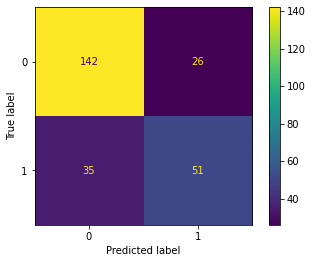

In [169]:
#confusion matrix for random forest (can further help tell story that the two are similar in performance)
plot_confusion_matrix(model_skl_2, X_test, y_test)

What predictors are actually significant in the model?

In [ ]:
#using statsmodels so that we can see the significance of each predictor
import statsmodels.api as sm
import statsmodels.formula.api as smf

X_train_sm = pd.concat([X_train,y_train],axis=1) #put in format needed for statsmodels package

formula = "Outcome~Pregnancies+Glucose+BloodPressure+SkinThickness+Insulin+BMI+DiabetesPedigreeFunction+Age_20s+Age_30s+Age_40s+Age_50s+Age_60s+Age_70s+Age_80s"
model_sm_1 = smf.glm(formula=formula, data=X_train_sm, family=sm.families.Binomial()).fit()
print(model_sm_1.summary())

In [ ]:
formula = "Outcome~Glucose+BMI"
model_sm_2 = smf.glm(formula=formula, data=X_train_sm, family=sm.families.Binomial()).fit()
print(model_sm_2.summary())

Making the final data & model with the two significant columns (BMI & Insulin)

In [173]:
#make final data and re-split
X_final = df.iloc[:, [1,5]]
y_final = df.Outcome
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

#train the final model
model_final = LogisticRegression(max_iter=1000).fit(X_train_final, y_train_final)

#apply model to test set
y_pred_final = model_final.predict(X_test_final)
accuracy_score(y_test_final,y_pred_final)

0.7519685039370079

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



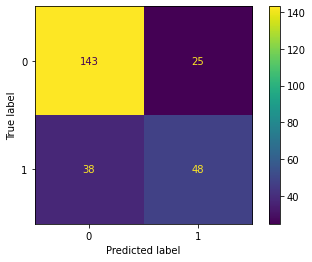

In [175]:
conf_mat = plot_confusion_matrix(model_final, X_test_final, y_test_final)

Now we can build an interactive app!

In [ ]:
!pip install pyngrok
!pip install dash_bootstrap_components
!pip install jupyter_dash

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



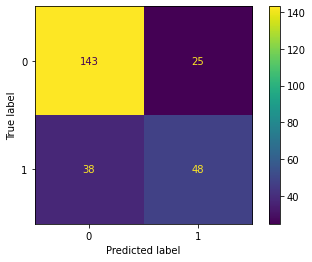

In [178]:
import pandas as pd
from jupyter_dash import JupyterDash
import dash_bootstrap_components as dbc
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output, State
import plotly.express as px

#load the data
df = pd.read_csv('https://raw.githubusercontent.com/machochocolate/CapstoneGH/master/diabetes.csv')

#make the plot that's shown before the user inputs anything
bar_plot = px.bar(df_group, x = "Age_Group_Plot", y = "Pct")
conf_mat = plot_confusion_matrix(model_final, X_test_final, y_test_final)

prevent_init = False
app = JupyterDash(__name__, prevent_initial_callbacks = prevent_init)

app.layout = html.Div([
    html.H1('Diabetes Dashboard'),
    

    #the initial plot
    html.H2("Age distribution"),
    dcc.Graph(
      id='barchart_output',
      figure = bar_plot
    ),

    #the inputs for the dashboard
    html.H2("User inputs"),
    dcc.Input(
      id="bmi_input",
      type="number",
      value = 0,
      placeholder="Enter BMI"
    ),
    dcc.Input(
      id="glucose_input",
      type="number",
      value = 00,
      placeholder="Enter glucose"
    ),
    dcc.Input(
        id = "age_input",
        type = "number",
        value = 0,
        placeholder = "Enter age"
    ),
    html.Button('Submit', id='update_data'),


    #the prediction from the model
    html.Br(),
    html.Div(id = "pred_output"),

    #scatterplot of where user falls
    html.H2("Prediction scatterplot"),
    dcc.Graph(
      id='scatterplot_output',
      figure = {}
    ),

    html.H2("Confusion matrix"),
    #dcc.Graph(
    #  id='cf_output',
    #  figure = conf_mat
    #),

], className="container")


#returning the prediction
@app.callback(
    Output(component_id='pred_output', component_property='children'),
    inputs = [ Input(component_id="update_data", component_property="n_clicks") ],
    state = [ State('glucose_input', 'value'), State('bmi_input', 'value')]
)
def return_pred(n_clicks, glucose, bmi):
    df_in = pd.DataFrame(list(zip( [glucose], [bmi] )), columns = ['Glucose','BMI'])
    prob = round(round(model_final.predict_proba(df_in)[0,1],3)*100,1)
    return "{}% chance of diabetes ".format(prob)


#returning the scatterplot
@app.callback(
    Output(component_id='scatterplot_output', component_property='figure'),
    inputs = [ Input(component_id="update_data", component_property="n_clicks") ],
    state = [ State('glucose_input', 'value'), State('bmi_input', 'value')]
)
def return_scatterplot(n_clicks, glucose, bmi):
    
    #take the final data and add a column for the prediction / prediction color
    X_test_final["Prediction"] = ["Yes" if pred==1 else 'No' for pred in y_pred_final]

    #make a new point to add
    df_in = pd.DataFrame(list(zip( [glucose], [bmi], ["You"] )), columns = ['Glucose','BMI','Prediction'])

    #make final data
    df_plot = pd.concat([X_test_final, df_in], axis=0)

    #make the plot
    fig = px.scatter(df_plot, x="Glucose", y="BMI", color="Prediction")
    fig.update_layout(clickmode='event+select')
    fig.update_traces(marker_size=20)
    return fig

@app.callback(
    Output(component_id='scatterplot_output', component_property='figure'),
    inputs = [ Input(component_id="update_data", component_property="n_clicks") ],
    state = [ State('glucose_input', 'value'), State('bmi_input', 'value')]
)
def return_cf():

    buf = io.BytesIO() # in-memory files
    plt.scatter(x, y)
    plt.savefig(buf, format = "png") # save to the above file object
    plt.close()
    data = base64.b64encode(buf.getbuffer()).decode("utf8") # encode to html elements
    return "data:image/png;base64,{}".format(data)


In [179]:
app.run_server(mode='external', port = 8050)

Dash app running on:


<IPython.core.display.Javascript object>